___
# MINIPROJETO 1

## Bruna Kimura
___

## Notas do Enade

___
### Itens 1 a 3 - Resolução:

In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruna\Documents\GitHub\CD\MiniProjeto_1


### <font color='steelblue'>Item 1</font>

In [83]:
dados = pd.read_csv('microdados_enade_2014.csv', encoding='windows-1252', sep=';')
dados.head()

C:\Users\Bruna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (143,144,145,146,147,148,149,150,151,152,153,154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,co_curso,nu_idade,...,qe_i72,qe_i73,qe_i74,qe_i75,qe_i76,qe_i77,qe_i78,qe_i79,qe_i80,qe_i81
0,2014,21,1,10002,10028,5103403,51,5,44,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,21,1,10002,10028,5103403,51,5,44,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,21,1,10002,10028,5103403,51,5,44,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,21,1,10002,10028,5103403,51,5,44,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,21,1,10002,10028,5103403,51,5,44,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='steelblue'>Item 2</font>

In [84]:
dadosCut1 = dados[(~dados.nt_ger.isnull())]

### <font color='steelblue'>Item 3</font>

In [85]:
dadosCut1.nt_ger.describe()

count    396776.000000
mean         44.343993
std          14.653711
min           0.000000
25%          33.800000
50%          44.000000
75%          54.600000
max          97.400000
Name: nt_ger, dtype: float64

In [86]:
faixa=np.arange(0,  101, 1)
b = pd.cut(dadosCut1.nt_ger, faixa)
b.head()

0    (66, 67]
1    (52, 53]
2    (58, 59]
3    (61, 62]
4    (71, 72]
Name: nt_ger, dtype: category
Categories (100, object): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (96, 97] < (97, 98] < (98, 99] < (99, 100]]

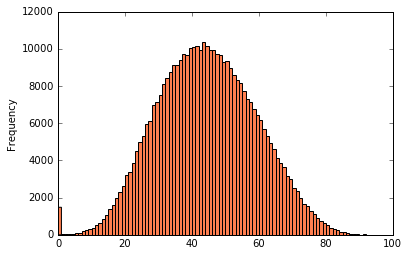

In [87]:
hist=dadosCut1.nt_ger.plot.hist(bins=faixa, color='coral')
plt.show()

___
### Itens 4 a 6 - Resolução:

### <font color='steelblue'>Item 4</font> 

O gráfico se comportou da forma esperada, uma vez que ela demonstra as notas gerais no Enade. Sendo que as notas mais baixa e as mais altas tem menos frequência que as notas médias.

O gráfico segue um formato simétrico.

Uma das distribuição teórica que representa o gráfico é o normal padrão.

Outra que também segue esse padrão do centro mais frequente e as laterais com caudas é a distribuição em T.

### <font color='steelblue'>Item 5</font> 

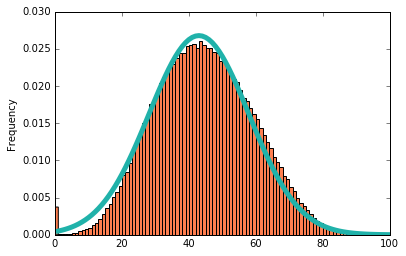

In [88]:
ordenada=sorted(dadosCut1.nt_ger)

x = range(1,101,1)
plt.plot(x, stats.norm.pdf(x, loc=43, scale=14.9),
    'r-', lw=5, color='lightseagreen', label='norm pdf')
hist=dadosCut1.nt_ger.plot.hist(bins=faixa, color='coral', normed=1)
plt.show()

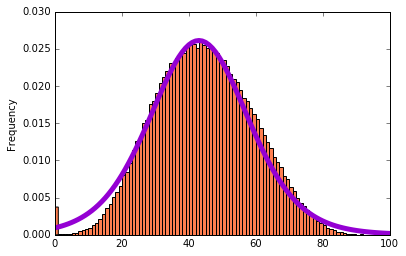

In [89]:
df=10

x = range(0, 101, 1)
plt.plot(x, stats.t.pdf(x, df, loc=43, scale=14.9),
         'r-', lw=5, color='darkviolet', label='t pdf')
hist=dadosCut1.nt_ger.plot.hist(bins=faixa, color='coral', normed=1)
plt.show()

### <font color='steelblue'>Item 6</font> 

In [90]:
a=stats.norm.fit(dadosCut1.nt_ger)
a

(44.343993336290502, 14.653692685735548)

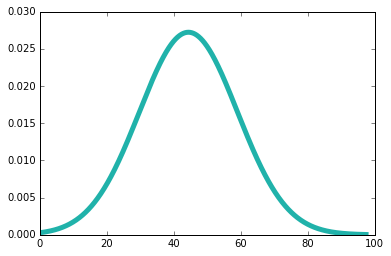

In [91]:
o=ordenada

plt.plot(o, stats.norm.pdf(o, loc=a[0], scale=a[1]), 'r-', lw=5, color='lightseagreen', label='norm pdf')
plt.show()


         

In [92]:
b=stats.t.fit(dadosCut1.nt_ger, loc=0, scale=1)
b

(14335.073194384691, 44.34396735357511, 14.652844062670731)

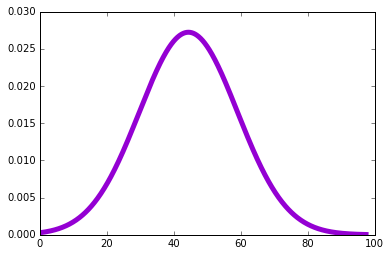

In [93]:
df=b[0]

o = ordenada
plt.plot(o, stats.t.pdf(o, df, loc=b[1], scale=b[2]),
         'r-', lw=5, color='darkviolet', label='t pdf')
plt.show()

### Os parâmetros encontrados na função fit são mais fieis ao histograma.

___
### Itens 7 a 9 - Resolução:

### <font color='steelblue'>Item 7</font> 

##### Apesar de que nos parâmentros estimados o topo da curva estar mais semelhate, nas feitas diretamente pelo fit, temos as laterais bastante semelhantes. Portanto escolhi trabalhar com a curva gerada pela função fit().

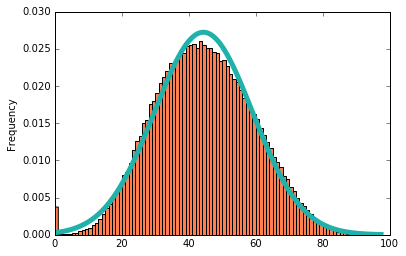

In [94]:
o=ordenada
plt.plot(o, stats.norm.pdf(o, loc=a[0], scale=a[1]), 'r-', lw=5, color='lightseagreen', label='norm pdf')
hist=dadosCut1.nt_ger.plot.hist(bins=faixa, color='coral', normed=1)

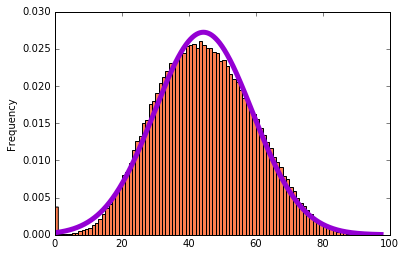

In [95]:
df=b[0]

o = ordenada
plt.plot(o, stats.t.pdf(o, df, loc=b[1], scale=b[2]),
         'r-', lw=5, color='darkviolet', label='t pdf')
hist=dadosCut1.nt_ger.plot.hist(bins=faixa, color='coral', normed=1)
plt.show()

### <font color='steelblue'>Item 8</font> 

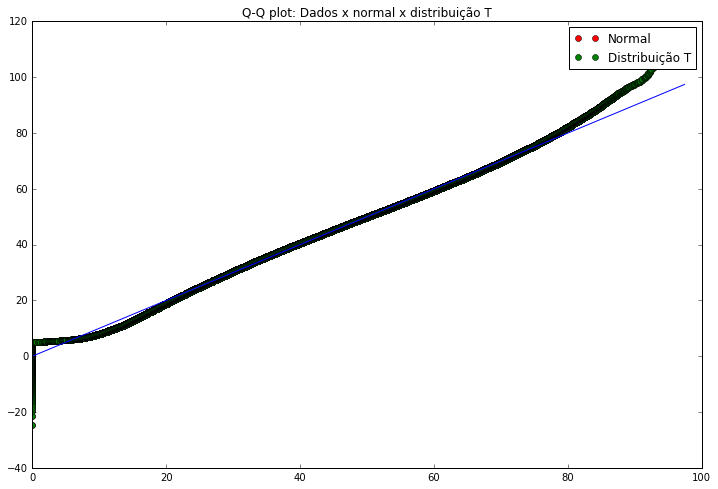

In [123]:
fra = [] # frequencia relativa acumulada
for i in range(len(o)):
    acc = (i - 0.5) / len(o)
    if acc < 0:
        acc = 0
    fra.append(acc) 

fra = pd.Series(data=fra)

q_norm = stats.norm.ppf(fra, loc=a[0], scale=a[1])
q_t = stats.t.ppf(fra, df, scale=b[2], loc=b[1])

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x normal x distribuição T")

norm_plot, = plt.plot(o, q_norm, 'o', color="red", label="Normal")
t_plot, = plt.plot(o, q_t, 'o', color="green", label = "Distribuição T")

plt.legend(handles=[norm_plot, t_plot])
plt.plot((min(o), max(o)), (min(o), max(o)), '-')


plt.show()


##### Conseguimos ver que os dois pontos (norma e distribuição em T) estão praticamente iguais. E como a quatidade de dados é bastate alta, os pontos estão muito perto quase formando uma linha.

### <font color='steelblue'>Item 9</font> 

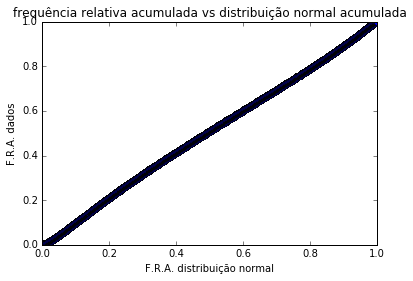

In [124]:
acumulada_normal=stats.norm.cdf(o, loc=a[0], scale=a[1])
plt.plot(acumulada_normal, fra, 'o')
plt.title("frequência relativa acumulada vs distribuição normal acumulada")
plt.ylabel('F.R.A. dados')
plt.xlabel('F.R.A. distribuição normal')
plt.show()

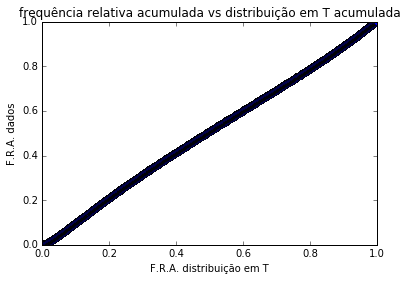

In [125]:
acumulada_t=stats.t.cdf(o, df, loc=b[1], scale=b[2])
plt.plot(acumulada_t, fra, 'o')
plt.title("frequência relativa acumulada vs distribuição em T acumulada")
plt.ylabel('F.R.A. dados')
plt.xlabel('F.R.A. distribuição em T')
plt.show()

##### Aqui também vemos a proximidade dos valores das duas distribuições teóricas

___
### Itens 10 e 11 - Resolução:

### <font color='steelblue'>Item 10</font> 

#### <font color='midnightblue'>Item 10.1:</font> Erro quadrático

In [126]:
soma_norm=[]
for i in range(1,len(o)):
    k=(o[i]-q_norm[i])**2
    if k!='int':
        soma_norm.append(k)
erro_norm=sum(soma_norm)   
print("Erro quadrático da normal: {0}".format(erro_norm))

soma_t=[]
for i in range(1,len(o)):
    l=(o[i]-q_t[i])**2
    if l!='int':
        soma_t.append(l)
erro_t=sum(soma_t)
print("Erro quadrático da T: {0}".format(erro_t))


Erro quadrático da normal: 205782.89177060995
Erro quadrático da T: 206026.93507991446


#### <font color='midnightblue'>Item 10.2:</font> Erro quadrático médio

In [127]:
erro_norm2=erro_norm/len(o)
erro_t2=erro_t/len(o)

print("Erro quadratico médio da normal :", erro_norm2)
print("Erro quadratico médio da t :", erro_t2)

Erro quadratico médio da normal : 0.518637447251
Erro quadratico médio da t : 0.519252512954


#### <font color='midnightblue'>Item 10.4:</font>Teste aderência cumulativa

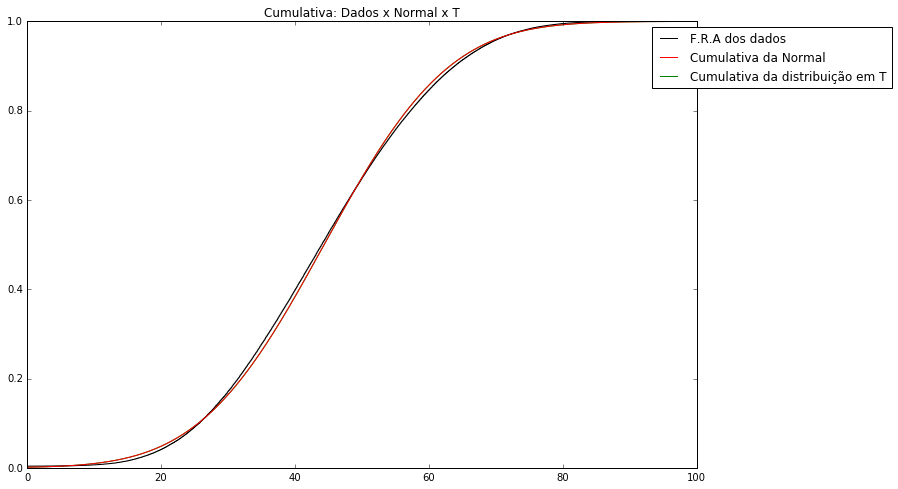

In [130]:
fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Normal x T")

cdf_t_plot, = plt.plot(o, acumulada_t, '-', color='green', label = "Cumulativa da distribuição em T")
dados_fra_plot, = plt.plot(o, fra, '-', color='black', label="F.R.A dos dados")
cdf_norm_plot,  = plt.plot(o, acumulada_normal, '-', color='red', label = "Cumulativa da Normal")


plt.legend(handles=[dados_fra_plot, cdf_norm_plot, cdf_t_plot], bbox_to_anchor=(1.3,1))
plt.show()




    

##### a CDF de T e da Normal ficaram muito semelhantes. Portanto não conseguimos ver a linha verde que está plotada abaixo da vermelha.

#### <font color='midnightblue'>Item 10.5:</font>Erro quadrático nas CDFs


In [117]:
# Erro quadrático nas CDFs
erro_quad_cdf_norm = sum((fra - acumulada_normal)**2)

erro_quad_cdf_t = sum((fra - acumulada_t)**2)

print("Erro quadrático da CDF da Normal versus F.R.A", erro_quad_cdf_norm)
print("Erro quadrático da CDF de T versus F.R.A", erro_quad_cdf_t)

Erro quadrático da CDF da Normal versus F.R.A 35.2926150822
Erro quadrático da CDF de T versus F.R.A 35.3193227289


#### <font color='midnightblue'>Item 10.6:</font> Diferenças absolutas

In [118]:
# Diferenças absolutas
soma_difs_cdf_normal = sum( abs(fra - acumulada_normal))
soma_difs_cdf_t = sum( abs(fra - acumulada_t))

print("Erro da soma do módulo das diferenças da normal versus F.R.A: {0} \nErro da soma do módulo das diferenças de T versus F.R.A: {1}".format(soma_difs_cdf_normal, soma_difs_cdf_t))

Erro da soma do módulo das diferenças da normal versus F.R.A: 3262.2607492679854 
Erro da soma do módulo das diferenças de T versus F.R.A: 3263.5295055323304


#### <font color='midnightblue'>Item 10.7:</font>Teste de aderência de Kolmogorov-Smirnov

In [129]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_norm = max(abs(fra-acumulada_normal))
ks_aderencia_t = max(abs(fra-acumulada_t))


print("Teste K-S para a normal com μ= {:4.3f}: {:4.4f}\n\
Teste K-S para o T com DF={:4.3f}, loc={:4.3f}, scale={:4.3f} e a={:4.4f}:".format(a[0], ks_aderencia_norm, df, b[1], b[2], ks_aderencia_t))

Teste K-S para a normal com μ= 44.344: 0.0172
Teste K-S para o T com DF=14335.073, loc=44.344, scale=14.653 e a=0.0172:


### <font color='steelblue'>Item 11</font> 


|           Erros    | Normal |Distribuição T|
|:----------------|:--------:|:--------------:|
| <b>Erro Quadrádico</b>| 205782 |   206026     |
| <b>E.Q. Médio</b>     | 0.5186 |   0.5192     |
| <b>E.Q. CDF</b>       | 35.292 |   35.319     |
| <b>Diferenças Absolutas</b>| 3262.26 | 3263.53 |
|<b>Kolmogorov-Smirnov</b>| 0.0172 | 0.0172 |






###### Concluimos que as duas distribuições são muito parecidas, apresentando erros extremamente parecidos. Tendo isso em mente, poderímos escolher qualquer uma das duas. Porém, se formos bastante minunciosos escolheríamos a distribuição normal, pois seu erro é um pouco menor que a distribuição em T. 